#  Your initials

Jean-Michel Torres 2020-01-30, IBM Q Hub France


Star & Download from: https://github.com/jmit34/

### Use QISKit to build a circuit to entangle 2 letters

<ol>
    <li>Instructions and data</li>
    <li>Setup (imports)</li>
    <li>Your circuit</li>
    <li>Result</li>
</ol>

## 1. Instructions & Data


The purpose of this exercise is to build a circuit that produces two equally probable bitstrings.

We will use a 7 qubit register and the ASCII code to represent letters from A to Z. ($b'1000001'$ for A to $b'1011010'$ for Z). 

The result will show something like this : 

<img src="./images/GT-initials.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="center">


Program imports and letter display are provided. 

You will have to : 

- pick-up two different letters (firstname, name, use middlemane if firstname and name have the same) 
- look-up for their binary ASCII values
- build a quantum circuit that outputs an equal superposition of those two values 

Here are the ASCII values for A to Z : 



| Letter | binary ASCII value | Letter | binary ASCII value | 
| ------ | ------------------ | ------ | ------------------ |
| A | 100 0001 | N | 100 1110 |
| B | 100 0010 | O | 100 1111 | 
| C | 100 0011 | P | 101 0000 |
| D | 100 0100 | Q | 101 0001 |
| E | 100 0101 | R | 101 0010 |
| F | 100 0110 | S | 101 0011 |
| G | 100 0111 | T | 101 0100 |
| H | 100 1000 | U | 101 0101 |
| I | 100 1001 | V | 101 0110 |
| J | 100 1010 | W | 101 0111 |
| K | 100 1011 | X | 101 1000 |
| L | 100 1100 | Y | 101 1001 |
| M | 100 1101 | Z | 101 1010 |


## 2. Initializations (imports)

In [4]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ, BasicAer
from qiskit.tools.jupyter import *
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Build your circuit

In [19]:
# build your circuit here, name it qc

## Essayer M, S J 
qc = QuantumCircuit(7)
qc.x(6)
qc.id(5)
qc.ry(1.91,4)
qc.ch(4,3)

qc.cx(3,2)
qc.cx(3,1)
qc.x(2)
qc.x(1)

qc.cx(3,0)

qc.measure_all()
qc.draw()


┌───┐ ░ ┌─┐                  
   q_0: ────────────────────────────────┤ X ├─░─┤M├──────────────────
                              ┌───┐┌───┐└─┬─┘ ░ └╥┘┌─┐               
   q_1: ──────────────────────┤ X ├┤ X ├──┼───░──╫─┤M├───────────────
                         ┌───┐└─┬─┘├───┤  │   ░  ║ └╥┘┌─┐            
   q_2: ─────────────────┤ X ├──┼──┤ X ├──┼───░──╫──╫─┤M├────────────
                    ┌───┐└─┬─┘  │  └───┘  │   ░  ║  ║ └╥┘┌─┐         
   q_3: ────────────┤ H ├──■────■─────────■───░──╫──╫──╫─┤M├─────────
        ┌──────────┐└─┬─┘                     ░  ║  ║  ║ └╥┘┌─┐      
   q_4: ┤ Ry(1.91) ├──■───────────────────────░──╫──╫──╫──╫─┤M├──────
        └──┬───┬───┘                          ░  ║  ║  ║  ║ └╥┘┌─┐   
   q_5: ───┤ I ├──────────────────────────────░──╫──╫──╫──╫──╫─┤M├───
           ├───┤                              ░  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_6: ───┤ X ├──────────────────────────────░──╫──╫──╫──╫──╫──╫─┤M├
           └───┘                              ░  ║  ║  ║  ║  ║  ║ └╥┘
meas: 7/═════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩═
                                                 0  1  2  3  4  5  6

In [20]:
backend = BasicAer.get_backend('qasm_simulator')
shots_sim = 1000

job_sim = execute(qc, backend, shots=shots_sim)
stats_sim = job_sim.result().get_counts()


print(stats_sim)

{'1010110': 347, '1011001': 346, '1000110': 307}


## 3. Run to view the result

10
{'1010100': 5, '1001010': 5}
0.5	T
0.5	J


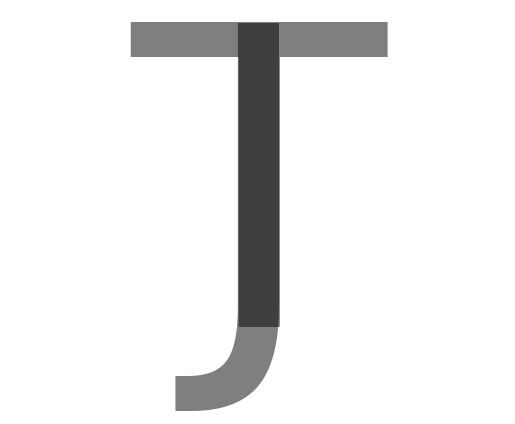

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
shots_sim = 10

job_sim = execute(qc, backend, shots=shots_sim)
stats_sim = job_sim.result().get_counts()

def plot_letter (stats, shots):
    ### code from the qiskit.org smiley demo
    for bitString in stats:
        char = chr(int( bitString[0:7] ,2)) # get string of the leftmost 7 bits and convert to an ASCII character
        prob = stats[bitString] / shots # fraction of shots for which this result occurred
        # create plot with all characters on top of each other with alpha given by how often it turned up in the output
        plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)
        if (prob>0.05): # list prob and char for the dominant results (occurred for more than 5% of shots)
            print(str(prob)+"\t"+char)
    plt.axis('off')
    plt.show()
    
print(shots_sim) 
print(stats_sim)
plot_letter(stats_sim, shots_sim)